# Agregação

Na biblioteca GeoPandas podemos agrupar feições através da função "dissolve".


In [5]:
%matplotlib inline
import os
import conda
os.environ['USE_PYGEOS'] = '0'
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

import geopandas as gpd

<Axes: >

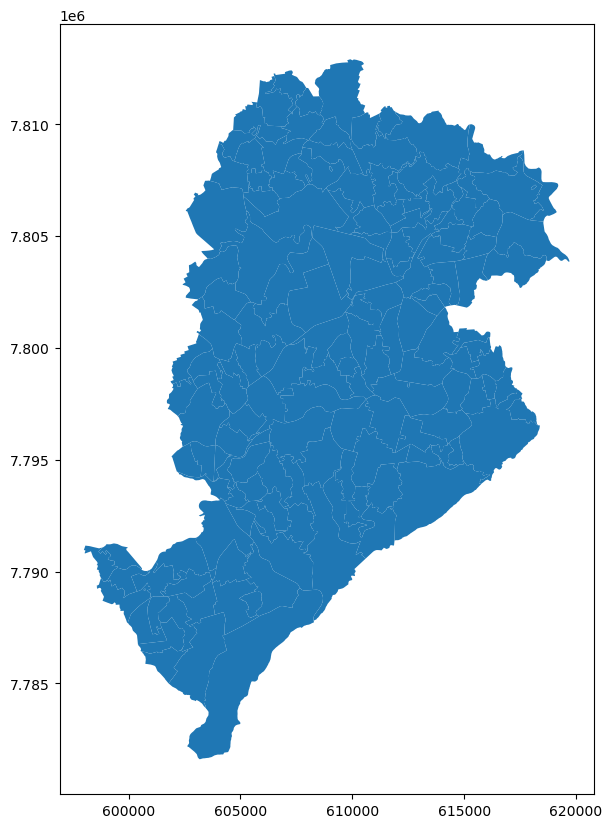

In [6]:
area_saude = gpd.read_file("../dados/AREA_ABRANGENCIA_SAUDE.shp")
area_saude.plot(figsize=(10, 10))

In [7]:
area_saude.head()

,ID_AREA_AB,COD_SMSA,NOME_AREA_,DISTRITO_S,NOME_CENTR,TIPO_LOGRA,NOME_LOGRA,NUMERO_IMO,NOME_BAIRR,TELEFONE_C,DATA_ULTIM,geometry
0,190.0,6420,C.S.SAO TOMAZ,NORTE,CENTRO DE SAUDE SAO TOMAZ,RUA,SANTA ROSA,54.0,São Tomáz,"32777997,32777347,32771556",20/02/2019,"POLYGON ((609020.556 7807023.558, 609122.112 7..."
1,68.0,5230,C.S.DOM CABRAL,NOROESTE,CENTRO DE SAUDE DOM CABRAL,PCA,DA COMUNIDADE,40.0,Dom Cabral,"32779664,32779665,32776487",20/02/2019,"POLYGON ((604071.306 7796510.893, 604074.406 7..."
2,201.0,5270,C.S.JARDIM FILADELFIA,NOROESTE,CENTRO DE SAUDE JARDIM FILADELFIA,RUA,CAITITE,309.0,Conjunto Jardim Filadélfia,"32777142,32778305",08/05/2020,"POLYGON ((602885.098 7798513.226, 602945.375 7..."
3,102.0,7340,C.S.SALGADO FILHO,OESTE,CENTRO DE SAUDE SALGADO FILHO,RUA,CAMPINA VERDE,375.0,Salgado Filho,"32776478,32779603,32776582",20/02/2019,"POLYGON ((605735.013 7794563.658, 605738.715 7..."
4,149.0,8280,C.S.PADRE JOAQUIM MAIA,PAMPULHA,CENTRO DE SAUDE PADRE JOAQUIM MAIA,RUA,BOAVENTURA,1900.0,Vila Rica,"32777433,32777874,32777886",20/02/2019,"POLYGON ((608225.718 7804958.138, 608248.394 7..."


In [8]:
distrito = area_saude[['DISTRITO_S','NOME_CENTR','geometry']]
distrito.head()

,DISTRITO_S,NOME_CENTR,geometry
0,NORTE,CENTRO DE SAUDE SAO TOMAZ,"POLYGON ((609020.556 7807023.558, 609122.112 7..."
1,NOROESTE,CENTRO DE SAUDE DOM CABRAL,"POLYGON ((604071.306 7796510.893, 604074.406 7..."
2,NOROESTE,CENTRO DE SAUDE JARDIM FILADELFIA,"POLYGON ((602885.098 7798513.226, 602945.375 7..."
3,OESTE,CENTRO DE SAUDE SALGADO FILHO,"POLYGON ((605735.013 7794563.658, 605738.715 7..."
4,PAMPULHA,CENTRO DE SAUDE PADRE JOAQUIM MAIA,"POLYGON ((608225.718 7804958.138, 608248.394 7..."


In [9]:
distrito['NOME_CENTR'].value_counts()

CENTRO DE SAUDE SAO TOMAZ           1
CENTRO DE SAUDE JARDIM GUANABARA    1
CENTRO DE SAUDE REGINA              1
CENTRO DE SAUDE CEU AZUL            1
CENTRO DE SAUDE PROVIDENCIA         1
                                   ..
CENTRO DE SAUDE BOA VISTA           1
CENTRO DE SAUDE CAFEZAL             1
CENTRO DE SAUDE ZILAH SPOSITO       1
CENTRO DE SAUDE NOVA YORK           1
CENTRO DE SAUDE PADRE TIAGO         1
Name: NOME_CENTR, Length: 152, dtype: int64

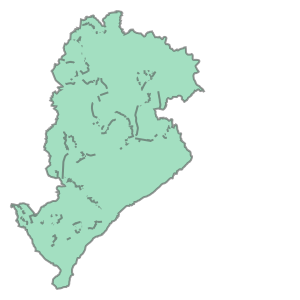

In [10]:
distrito_unico = distrito['geometry'].unary_union
distrito_unico

In [11]:
distrito_saude = distrito.dissolve(by='DISTRITO_S')
distrito_saude

,geometry,NOME_CENTR
DISTRITO_S,,
BARREIRO,"POLYGON ((601782.596 7785003.026, 601770.919 7...",CENTRO DE SAUDE BONSUCESSO
CENTRO-SUL,"POLYGON ((608694.561 7793771.375, 608699.673 7...",CENTRO DE SAUDE MENINO JESUS
LESTE,"POLYGON ((614748.050 7796046.883, 614704.512 7...",CENTRO DE SAUDE SANTA INES
NORDESTE,"POLYGON ((611626.682 7799145.478, 611641.995 7...",CENTRO DE SAUDE DOM JOAQUIM
NOROESTE,"POLYGON ((603908.870 7796001.894, 603938.943 7...",CENTRO DE SAUDE DOM CABRAL
NORTE,"POLYGON ((612689.836 7804042.969, 612708.249 7...",CENTRO DE SAUDE SAO TOMAZ
OESTE,"POLYGON ((605190.595 7791756.771, 605015.692 7...",CENTRO DE SAUDE SALGADO FILHO
PAMPULHA,"POLYGON ((605272.105 7798141.612, 605222.432 7...",CENTRO DE SAUDE PADRE JOAQUIM MAIA
VENDA NOVA,"POLYGON ((606479.742 7807048.579, 606487.518 7...",CENTRO DE SAUDE SANTA MONICA II - ALAMEDA DOS ...


In [12]:
distrito_saude = distrito.dissolve(by='DISTRITO_S', aggfunc='count')
distrito_saude

,geometry,NOME_CENTR
DISTRITO_S,,
BARREIRO,"POLYGON ((601782.596 7785003.026, 601770.919 7...",20
CENTRO-SUL,"POLYGON ((608694.561 7793771.375, 608699.673 7...",12
LESTE,"POLYGON ((614748.050 7796046.883, 614704.512 7...",14
NORDESTE,"POLYGON ((611626.682 7799145.478, 611641.995 7...",21
NOROESTE,"POLYGON ((603908.870 7796001.894, 603938.943 7...",16
NORTE,"POLYGON ((612689.836 7804042.969, 612708.249 7...",20
OESTE,"POLYGON ((605190.595 7791756.771, 605015.692 7...",18
PAMPULHA,"POLYGON ((605272.105 7798141.612, 605222.432 7...",14
VENDA NOVA,"POLYGON ((606479.742 7807048.579, 606487.518 7...",17


<Axes: >

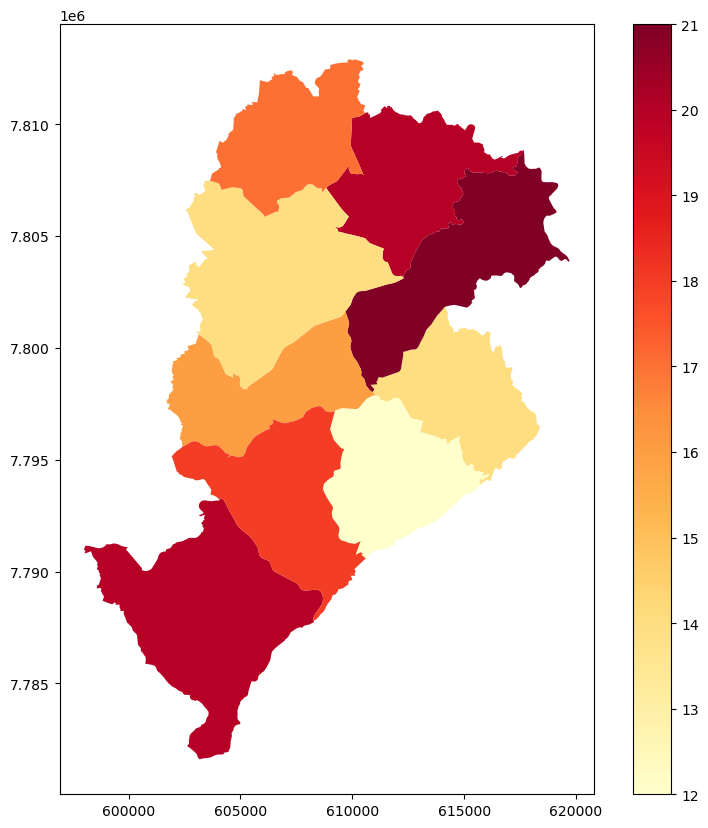

In [13]:
distrito_saude.plot(column = "NOME_CENTR", legend=True, figsize=(10, 10), cmap='YlOrRd')